# Part II - Ford Gobike Sharing Data Analysis
## by Abiola Aderemi


## Investigation Overview

1. Generally, most bike rides lasted for 5 - 10 minutes, while subscribers rode for 10 - 15 minutes and 20 - 27 minutes for customers.

2. The duration of bike rides across time periods for subscribers was very consistent and did not vary widely like that of customers. This could be as a result of subscribers being the overhelming majority of riders.

3. Most bike trips were carried out during the weekday (Monday - Friday), with over 25,000 trips recorded. The peak day for bike rides was on Thursday - 35,000 trips. Saturday and Sunday recorded about 15,000 trips. This tallies with earlier analysis done on days of the month.


## Dataset Overview

This dataset contains bike rides around San Fransisco area in the month of February 2019. There are 183,412 bike trips with 4646 bikes and 329 stations in the dataset. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


%matplotlib inline

In [2]:
# importing and viewing the dataset
df_bike = pd.read_csv(r"C:\Users\abiolaPC\Downloads\project\201902-fordgobike-tripdata.csv")
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Overview of data shape
df_bike.shape

(183412, 16)

In [4]:
# Overview of data composition
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# convert start_time,end_time to datetime64[ns] types
df_bike['start_time'] = df_bike['start_time'].astype('datetime64[ns]')
df_bike['end_time'] = df_bike['end_time'].astype('datetime64[ns]')

# identify columns with categorical data
df_bike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
# convert user_type, member_gender & bike_share_for_all_trip to category type
df_bike['user_type'] = df_bike['user_type'].astype('category')
df_bike['member_gender'] = df_bike['member_gender'].astype('category')
df_bike['bike_share_for_all_trip'] = df_bike['bike_share_for_all_trip'].astype('category')

In [7]:
#dropping some columns
#cols = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
df_bike = df_bike.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis =1)


In [8]:
# confirming dropped columns
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  int64         
 8   user_type                183412 non-null  category      
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  category      
 11  bike_share_for_all_trip  183412 non-null  category      
dtypes: category(3), 

In [9]:
# convert start_station_id, end_station_id & bike_id to string
df_bike['start_station_id'] = df_bike['start_station_id'].astype('str')
df_bike['end_station_id'] = df_bike['end_station_id'].astype('str')
df_bike['bike_id'] = df_bike['bike_id'].astype('str')

#checking for missing data
df_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
end_station_id                0
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# descriptive statistics
df_bike.describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


### What is the structure of your dataset?

> There are 183,412 bike trips with 4646 bikes and 329 stations in the dataset. Furthermore, 12 features are captured in the dataset (duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).

> Most variables are string, while user_type, member_gender & bike_share_for_all_trip are categorical.
> user_type(Subscriber & Customer), member_gender (Male, Female & Other), bike_share_for_all_trip (No & Yes).

### What is/are the main feature(s) of interest in your dataset?

> When are most trips taken in terms of time of day and day of the week? How long does the average trip take? What are the busiest stations? Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am interested in the trip duration and the demographic make up of the dataset.

## Univariate Exploration


### What are the durations (in seconds and minutes) of bike trips?

In [11]:
# log10 of the descriptive statistics to guide in getting an appropriate bin
np.log10(df_bike.duration_sec.describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

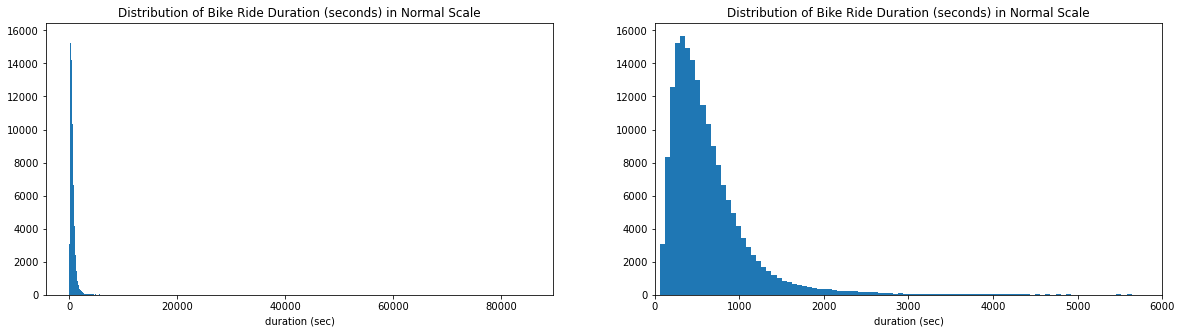

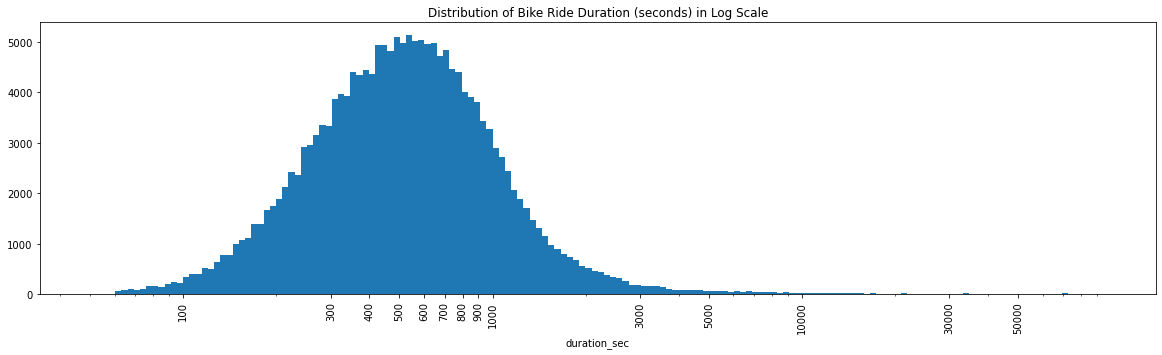

In [12]:
# setting  the bins for the chart
bins = np.arange(0, df_bike['duration_sec'].max()+10, 60)

# plot 1
plt.figure(figsize=[20, 5])
plt.subplot(1,2,1)
plt.hist(data = df_bike, x = 'duration_sec', bins = bins)
plt.xlabel('duration (sec)')
plt.title("Distribution of Bike Ride Duration (seconds) in Normal Scale"); 

# plot 2
plt.subplot(1,2,2)
plt.hist(data = df_bike, x = 'duration_sec', bins = bins)
plt.xlabel('duration (sec)')
plt.xlim(0,6000)
plt.title("Distribution of Bike Ride Duration (seconds) in Normal Scale")

# Generate the x-ticks to apply
log_ticks = [100, 300, 400, 500, 600, 700, 800, 900, 1000, 3000, 5000, 10000, 30000, 50000]
# Convert ticks into string values, to be displayed along the x-axis
log_labels = ['{}'.format(v) for v in log_ticks]

# plot 3
plt.figure(figsize=[20, 5])
bins = 10 ** np.arange(1.7, 4.9+0.1, 0.02)
plt.hist(data = df_bike, x = 'duration_sec', bins = bins)
plt.xlabel('duration_sec')
plt.xscale('log')

# Apply x-ticks
plt.xticks(log_ticks, log_labels, rotation=90);
plt.title("Distribution of Bike Ride Duration (seconds) in Log Scale");


Looking at the distribution of bike ride duration in seconds, a long tail was observed when plotted in the normal scale. Observing the distribution in the log scale, the peak duration was observed between 400 - 600 seconds. 

In [13]:
# feature engineering duration from seconds to minutes 
df_bike['duration_min']=df_bike.duration_sec/60
df_bike.duration_min.describe()
#np.log10(df_bike.duration_min.describe())

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

In [14]:
# Confirming the creation of duration_min column
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183412 non-null  object        
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  object        
 8   user_type                183412 non-null  category      
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  category      
 11  bike_share_for_all_trip  183412 non-null  category      
 12  duration_min    

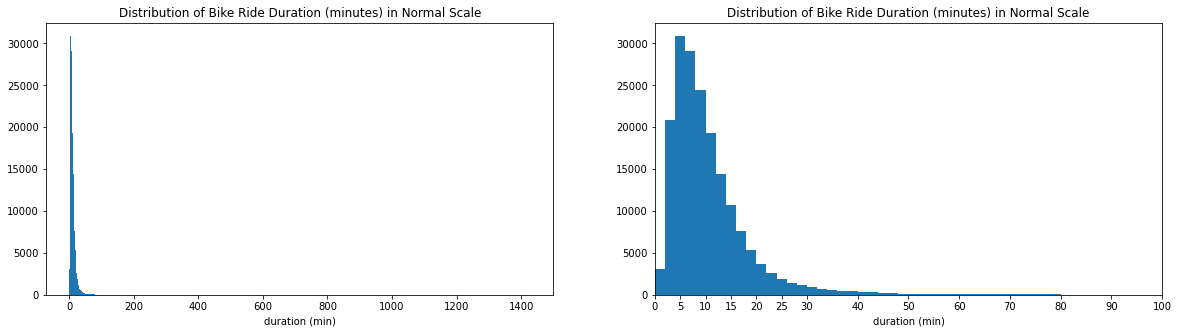

In [15]:
# setting  the bins for the chart
bins = np.arange(0, df_bike['duration_min'].max()+5, 2) 

plt.figure(figsize=[20, 5])
plt.subplot(1,2,1)
plt.hist(data = df_bike, x = 'duration_min', bins = bins)
plt.xlabel('duration (min)')
plt.title("Distribution of Bike Ride Duration (minutes) in Normal Scale"); 

# Generate the x-ticks to apply
ticks = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.subplot(1,2,2)
plt.hist(data = df_bike, x = 'duration_min', bins = bins)
plt.xlabel('duration (min)')
plt.xlim(0,100)
plt.title("Distribution of Bike Ride Duration (minutes) in Normal Scale"); 

# Apply x-ticks
plt.xticks(ticks, labels);

The distribution of the bike ride duration in minutes is similar to the duration in seconds. Peak duration was observed between 5 - 10 minutes.

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What are the number of bike rides per time period?

### What are the number of bike rides per day?

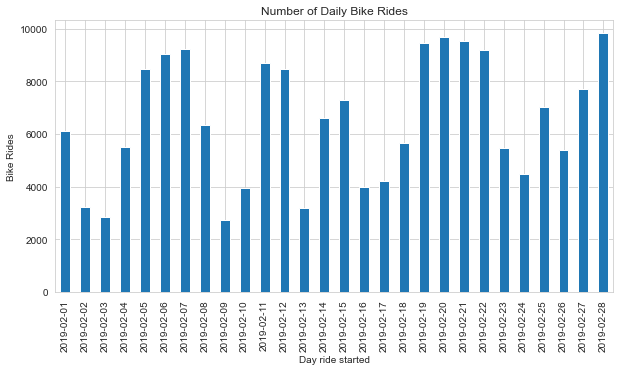

In [16]:
# include grid lines for easy data reading
sb.set_style("whitegrid")

# create a representation of the days
df_bike['start_day'] = df_bike['start_time'].map(lambda dt: dt.strftime('%Y-%m-%d'))
df_bike.start_day.value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Number of Daily Bike Rides', xlabel='Day ride started', ylabel='Bike Rides');


In [17]:
#sb.set_style("whitegrid")
# create a representation of the days
df_bike['end_day'] = df_bike['end_time'].map(lambda dt: dt.strftime('%Y-%m-%d'))


In [18]:
# converting start_day & end_day to datetime64[ns]
df_bike['start_day'] = df_bike['start_day'].astype('datetime64[ns]')
df_bike['end_day'] = df_bike['end_day'].astype('datetime64[ns]')

# computing bike trip carried over (days)
trip_day = df_bike.end_day - df_bike.start_day
trip_day = trip_day.value_counts()


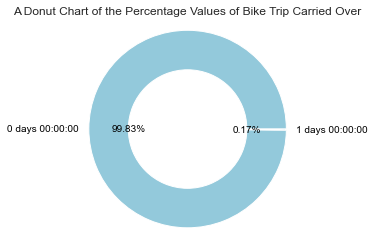

In [19]:
# setting palette
palette_color = sb.color_palette('ocean_r')

# creating pie plot
plt.pie(trip_day, labels = trip_day.index, startangle=0, autopct='%.2f%%',
        wedgeprops = {'width' : 0.4}, textprops={'color':'black'}, colors=palette_color );
plt.axis('square')

plt.title("A Donut Chart of the Percentage Values of Bike Trip Carried Over");

28/02/2019 (Thursday) had the most bike rides with almost 10,000 rides. 09/02/2019 (Saturday) had the least bike rides with about 2,500 rides.

Also, less than 1% of trips were carried over to the next day. This implies that further analysis on trips done on end days will be similar to that of start days.

### What are the number of bike rides per hour of the day?

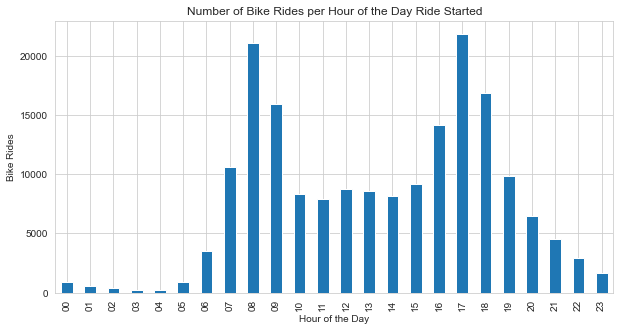

In [20]:
sb.set_style("whitegrid")
# create a representation of the days
df_bike['start_hour'] = df_bike['start_time'].map(lambda dt: dt.strftime('%H'))
df_bike.start_hour.value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Number of Bike Rides per Hour of the Day Ride Started', xlabel='Hour of the Day', ylabel='Bike Rides');

In [21]:
# create a representation of the days
df_bike['end_hour'] = df_bike['end_time'].map(lambda dt: dt.strftime('%H'))


Peak bike ride activities had two peaks in the morning from the hours of 7am to 9am, with trips above 10,000 - 8am had above 20,000 trips. 

Evening trips from the hours of 4pm to 6pm were also above 10,000 trips, with 5pm also having above 20,000 trips. This correlates with activity patterns of commuting to and from work. 

### What are the number of bike rides per day of the week?

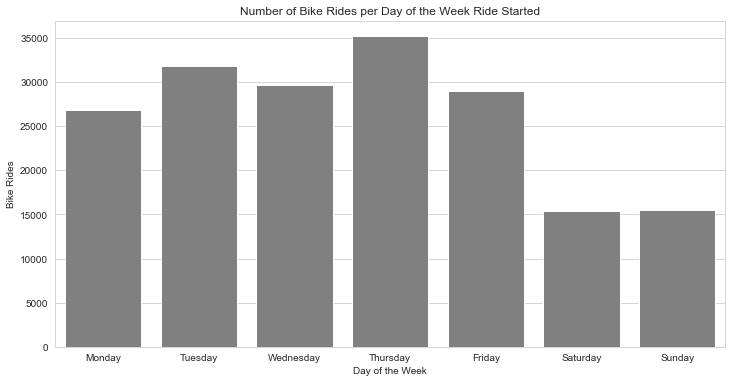

In [22]:
# ordered list of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# create a representation of the days
df_bike['start_weekday'] = df_bike['start_time'].map(lambda dt: dt.strftime('%A'))
#df_bike.start_weekday.value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Number of Bike Rides per Day of the Week Ride Started', xlabel='Day of the Week', ylabel='Bike Rides')

plt.figure(figsize=[12, 6])
sb.countplot(data = df_bike, x='start_weekday', order = day_order, color='grey');
plt.title('Number of Bike Rides per Day of the Week Ride Started')
plt.xlabel('Day of the Week')
plt.ylabel('Bike Rides');


# create a representation of the days
df_bike['end_weekday'] = df_bike['end_time'].map(lambda dt: dt.strftime('%A'))
#df_bike.start_weekday.value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Number of Bike Rides per Day of the Week Ride Started', xlabel='Day of the Week', ylabel='Bike Rides')



Most bike trips were carried out during the weekday (Monday - Friday), with over 25,000 trips recorded. 

The peak day for bike rides was on Thursday - 35,000 trips. Saturday and Sunday recorded about 15,000 trips. This tallies with earlier analysis done on days of the month.

### What are the busiest stations?

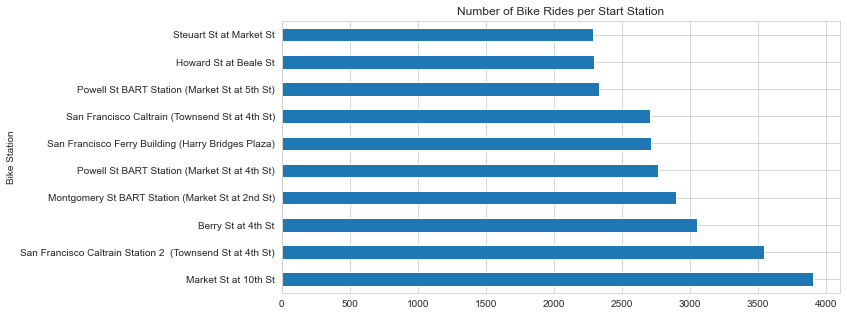

In [23]:
# top 10 start station
df_bike.start_station_name.value_counts().nlargest(10).plot(kind='barh', figsize=(10,5), title='Number of Bike Rides per Start Station', xlabel='Bike Station');

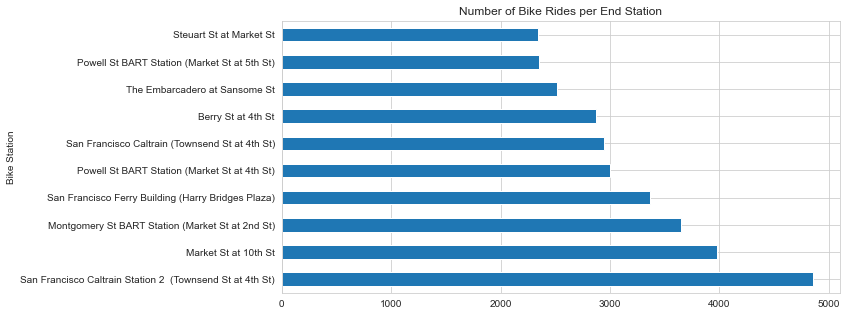

In [24]:
# top 10 end station
df_bike.end_station_name.value_counts().nlargest(10).plot(kind='barh', figsize=(10,5), title='Number of Bike Rides per End Station', xlabel='Bike Station');

Observing the top 4 start and end stations, 3 stations pop up as the busiest - Market St at 10th St, San Francisco Caltrain Station 2  (Townsend St at 4th St) & Montgomery St BART Station (Market St at 2nd St) in no particular order. These bike stations can be targetted for marketing, bike maintenance and expansion plans with futher analysis.

### What User Type has the Most Bike Rides?

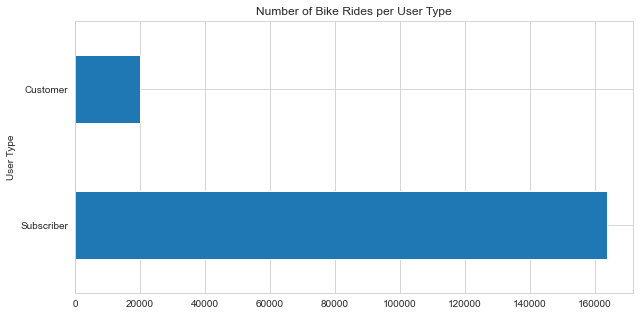

In [25]:
# horizontal bar plot
df_bike.user_type.value_counts().plot(kind='barh', figsize=(10,5), title='Number of Bike Rides per User Type', ylabel='Bike Rides', xlabel='User Type' );


From Federico Raimondi Cominesi's report, **Subscriber's** are frequent users with a subscription plan, while **Customer's** are occasional users who buy single rides. Over 160,000 rides were recorded for subscribers.



### What age group take the most bike rides? 

In [26]:
# identifying birth years before 1930
df_bike.member_birth_year[df_bike['member_birth_year'] < 1930].value_counts()


1900.0    53
1902.0    11
1901.0     6
1920.0     3
1878.0     1
1928.0     1
1910.0     1
1927.0     1
Name: member_birth_year, dtype: int64

In [27]:
# replacing 1900,1902,1901,1878,1910 with 2000,2001,2001,1978,1920
df_bike.member_birth_year = df_bike.member_birth_year.replace([1900,1902,1901,1878,1910],[2000,2001,2001,1978,1920])
df_bike.member_birth_year.describe()

count    175147.000000
mean       1984.846969
std           9.976001
min        1920.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

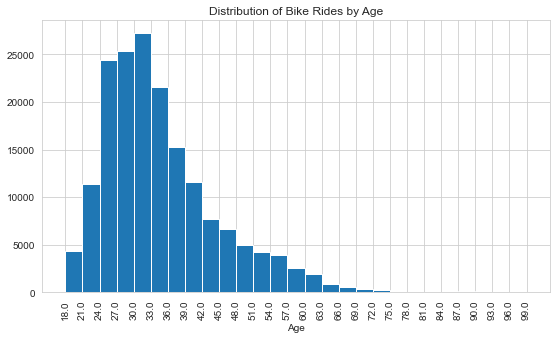

In [28]:
# create age column
df_bike['age'] = 2019 - df_bike.member_birth_year

# create age bins
bins = np.arange(df_bike['age'].min(), df_bike['age'].max()+1, 3) 

# Generate the x-ticks to apply
ticks = bins
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# create histogram
plt.figure(figsize=[20, 5])
plt.subplot(1,2,1)
plt.hist(data = df_bike, x = 'age', bins = bins)
plt.xlabel('Age')
plt.xticks(ticks, labels, rotation=90)
plt.title("Distribution of Bike Rides by Age"); 

The distribution has a long tail. The 30 - 33 years age group has the highest number of bike rides (over 25,000), with the 27 - 30 years age group a close second of about 25,000 rides.

### How many rides were as a result of bike sharing?

In [29]:
# evaluating rides as a result of bike sharing
bike_share = df_bike.bike_share_for_all_trip.value_counts()
bike_share.values

array([166053,  17359], dtype=int64)

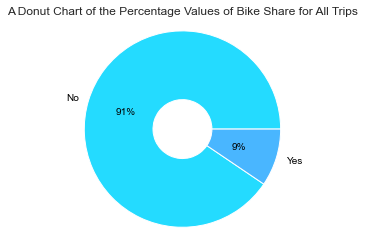

In [30]:
# set palette color
palette_color = sb.color_palette('cool')

# plot pie chart
plt.pie(bike_share, labels = bike_share.index, startangle=0, autopct='%1.0f%%',
        wedgeprops = {'width' : 0.7}, textprops={'color':'black'}, colors=palette_color );
plt.axis('square')

plt.title("A Donut Chart of the Percentage Values of Bike Share for All Trips");

9% of bike rides were as a result of bike sharing. To my understanding, this may be peer to peer sharing of bikes that earns its owner some money.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution for the bike ride duration in seconds was not clear until the Xscale was first limited to 6,000 rides to focus on the distribution area. To futher aid in visualising the data, it was then plotted in log scale, the peak duration was observed between 400 - 600 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. To analyse the age group of riders, the member_birth_year was checked to see the range of the years. 1878, 1900, 1902, 1901, 1910 were some of the outliers and was replaced with 1978, 2000, 2001, 2001, 1920. I assumed that majority of them (1878, 1900, 1902, 1901) were typos, while 1910 was brought to the upper limit of 1920. Computation of the age was done and a column was created. This aided in the age group demography plot as it looked unsafe to be having riders above 80 years although outliers of 99 years were welcome.

>2. For bike rides per hour of the day, day of the week and day of the month, start_time was transformed into start_hour, start_weekday & start_day, with columns created for them respectively. This aided in their respective plots to identify peak periods. Transformation was also done on end_time to get end_day, which was used in computing trip_day which showed that less than 1% of trips were carried over to the next day. Thus, there was no need to plot bike rides per end day, hour or weekday.

## Bivariate Exploration



### User Type vs Duration of Bike Rides?

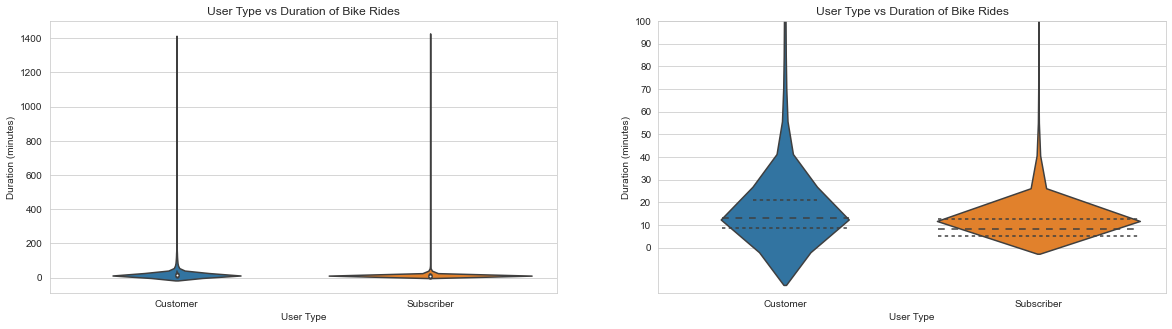

In [31]:
# plot 1
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data=df_bike, x='user_type', y='duration_min');
plt.title('User Type vs Duration of Bike Rides')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)');

# plot 2
plt.subplot(1, 2, 2)
sb.violinplot(data=df_bike, x='user_type', y='duration_min', inner='quartile');
plt.ylim(-20,100);plt.title('User Type vs Duration of Bike Rides')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)');
plt.yticks(np.arange(0,101,10));

The mean duration in minutes for customers and subscribers are about 15 minutes and 10 minutes respectively.

### Member Gender vs Duration of Bike Rides? 

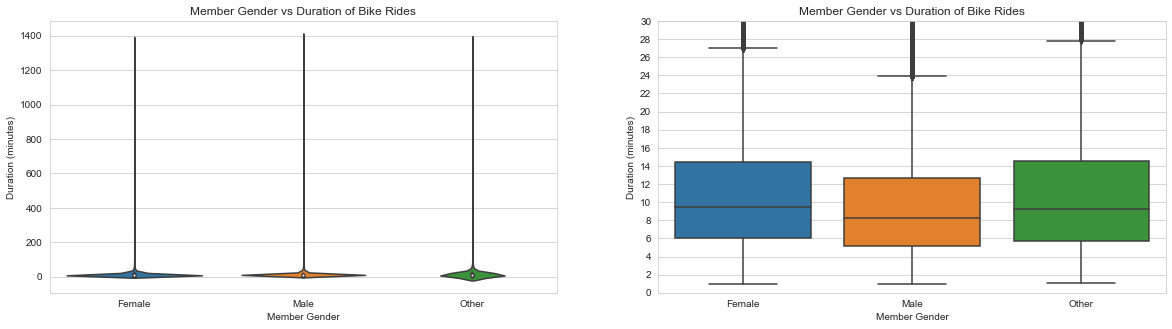

In [32]:
# plot 1
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data=df_bike, x='member_gender', y='duration_min');
plt.title('Member Gender vs Duration of Bike Rides')
plt.xlabel('Member Gender')
plt.ylabel('Duration (minutes)');

# plot 2
plt.subplot(1, 2, 2)
sb.boxplot(data=df_bike, x='member_gender', y='duration_min');
plt.ylim(0,30);
plt.title('Member Gender vs Duration of Bike Rides')
plt.xlabel('Member Gender')
plt.ylabel('Duration (minutes)');
plt.yticks(np.arange(0,31,2));


The female and other gender both had about 10 minutes as the mean for their bike rides respectively, unlike males having around 8 minutes.

## Duration of Bike Rides per Time Period?

### Duration of Bike Rides per Day of the Month?

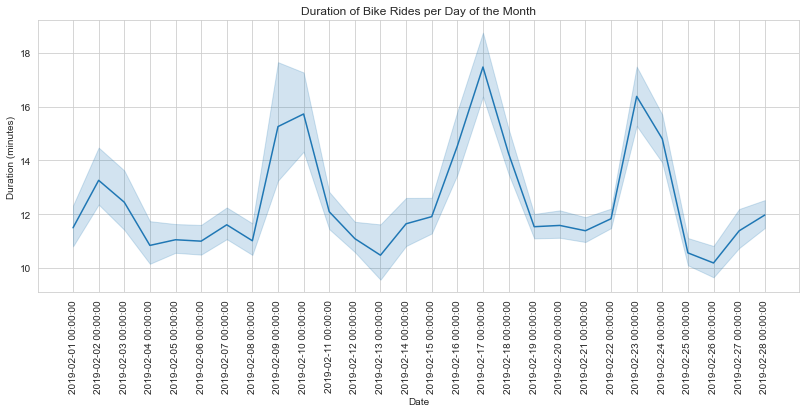

In [33]:
# plot
plt.figure(figsize=[30, 5])
plt.subplot(1, 2, 1)

# Generate the x-ticks to apply
ticks = pd.date_range(start='2/1/2019', end='2/28/2019')
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

sb.lineplot(data=df_bike, x='start_day', y='duration_min');
plt.title('Duration of Bike Rides per Day of the Month')
plt.xlabel('Date')
plt.ylabel('Duration (minutes)');
plt.xticks(ticks, labels, rotation = 90);

From the plot above, the peak ride duration were during the weekends, with the highest on the 17th of february 2019 having 17 minutes. 

### Duration of Bike Rides per Day of the Week?

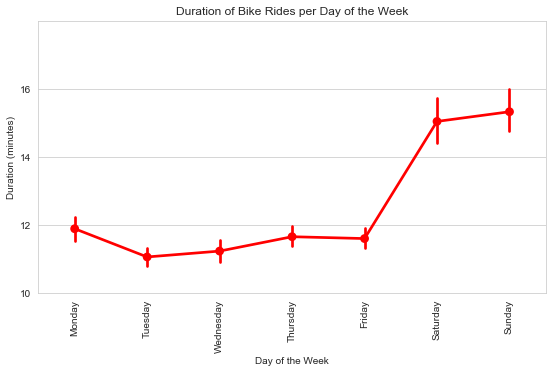

In [34]:
# plot
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)

#  make start_weekday ordered category
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_order = pd.api.types.CategoricalDtype(ordered=True, categories=day_order)
df_bike['start_weekday'] = df_bike['start_weekday'].astype(weekday_order);

sb.set_style("whitegrid")
sb.pointplot(data=df_bike, x='start_weekday', y='duration_min', color='red');
plt.title('Duration of Bike Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (minutes)');
plt.xticks(rotation = 90);
plt.ylim(10,18);
plt.yticks(np.arange(10,18,2));

The trend of the ride durations rose to about 15 minutes on the weekend, Sunday being the highest, and fell to between 11 - 12 minutes during the weekday, Tuesday being the lowest.

###  Duration of Bike Rides per Hour of the Day?

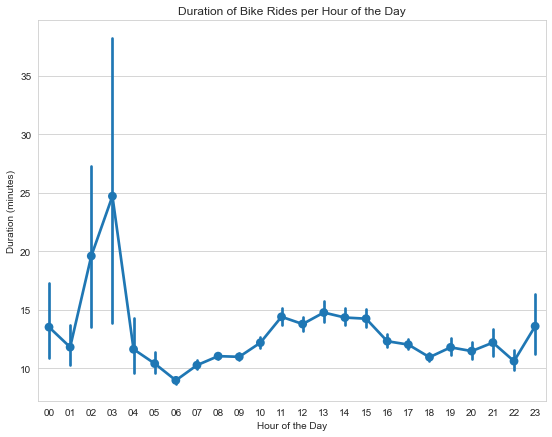

In [35]:
plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)

hour_order = [ '00',  '01',  '02',  '03',  '04',  '05',  '06',  '07', '08',  '09', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23']
day_hour_order = pd.api.types.CategoricalDtype(ordered=True, categories=hour_order)

df_bike['start_hour'] = df_bike['start_hour'].astype(day_hour_order);
sb.pointplot(data=df_bike, x='start_hour', y='duration_min');
plt.title('Duration of Bike Rides per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Duration (minutes)');


At 3am, the chart shows that about 25 minutes of cycling was done. This is quite curious and can be as a result of limited number of ride data at that hour.

In [36]:
# keeping track of data columns
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183412 non-null  object        
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  object        
 8   user_type                183412 non-null  category      
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  category      
 11  bike_share_for_all_trip  183412 non-null  category      
 12  duration_min    

### Member Gender breakdown of  Bike Rides by Hour of the Day, Day of the Week and Day of the Month?

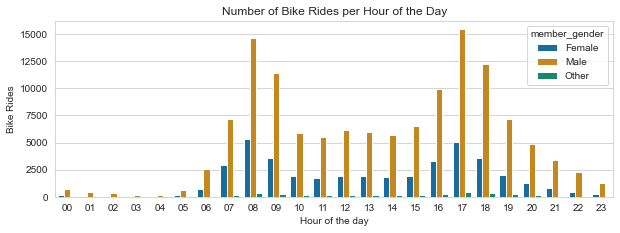

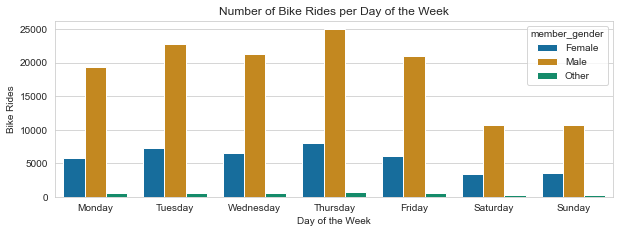

In [60]:
plt.figure(figsize = [10, 11])

# subplot 1:
plt.subplot(3, 1, 1)
sb.set_style("whitegrid")
sb.countplot(data = df_bike, x = 'start_hour', hue = 'member_gender', palette = 'colorblind',);
plt.title('Number of Bike Rides per Hour of the Day')
plt.xlabel('Hour of the day')
plt.ylabel('Bike Rides');

plt.figure(figsize = [10, 11])
# subplot 2:
plt.subplot(3, 1, 2)
sb.countplot(data = df_bike, x = 'start_weekday', hue = 'member_gender', palette = 'colorblind',);
plt.title('Number of Bike Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Bike Rides');



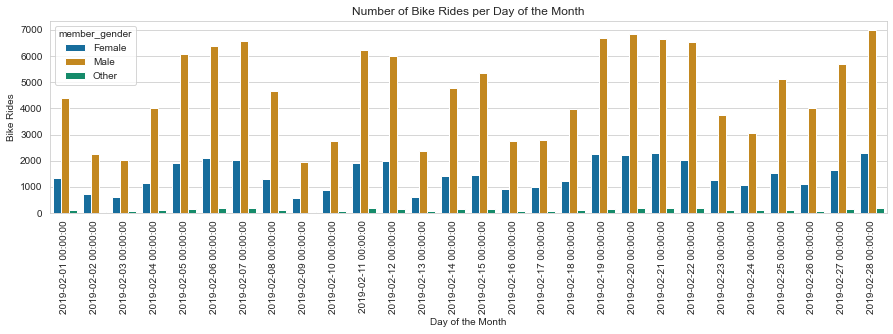

In [59]:
# Generate the x-ticks to apply
date = pd.date_range(start='2/1/2019', end='2/28/2019')
date_ticks = pd.api.types.CategoricalDtype(ordered=True, categories=date)
df_bike['start_day'] = df_bike['start_day'].astype(date_ticks);

# subplot 3:
plt.figure(figsize = [15, 12])
plt.subplot(3, 1, 3)
sb.countplot(data = df_bike, x = 'start_day', hue = 'member_gender', palette = 'colorblind',);
plt.title('Number of Bike Rides per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Bike Rides');
plt.xticks( rotation = 90);

1. Further analysis on the bike rides in minutes per time period (hour of the day, day of the week and day of the month) shows a similar trend when it is further decomposed into the member_gender categories. 

2. At 8am, there are about 5,000 bike rides by females, about 14,000 bike rides by males and less than 1,000 bike rides by other genders. At 5pm, there are about 5,000 bike rides by females, about 15,000 bike rides by males and less than 1,000 bike rides by other genders. 

3. During weekdays which has its peak bike rides on Thursday's, 25,000 trips are made by males, while about 8,000 and 1,000 trips are made by females and other genders respectively. 

4. On the 28th of february, 2019 about 7,000 bike rides were completed by males, with females and others completing about 2,000 and 300 trips respectively.  

### Member Gender/User Type vs Age?

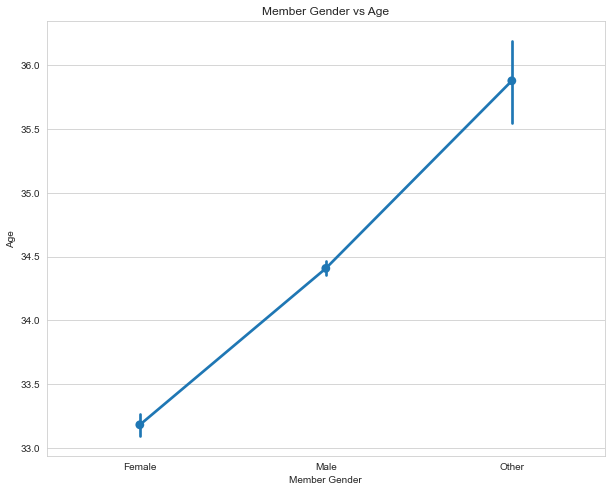

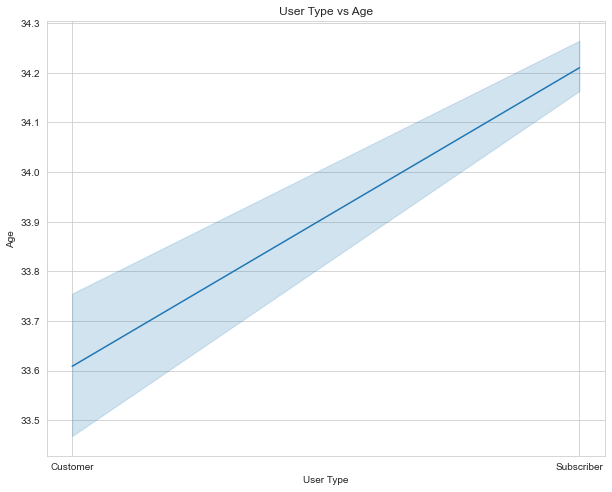

In [38]:
#plot 1

plt.figure(figsize = [10, 8])
sb.pointplot(data=df_bike, x='member_gender', y='age');
plt.title('Member Gender vs Age')
plt.xlabel('Member Gender')
plt.ylabel('Age');

#plot 2

plt.figure(figsize = [10, 8])
sb.lineplot(data=df_bike, x='user_type', y='age');
plt.title('User Type vs Age')
plt.xlabel('User Type')
plt.ylabel('Age');
plt.yticks();


The other gender was observed to have the highest mean age of 35.8 years in the dataset. Also, subscribers had a mean age of 34.2 years compared to customers.

### Bike Rides per User Type?

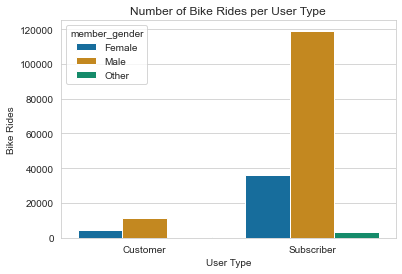

In [39]:
# plot
sb.countplot(data = df_bike, x = 'user_type', hue = 'member_gender', palette = 'colorblind',);
plt.title('Number of Bike Rides per User Type')
plt.xlabel('User Type')
plt.ylabel('Bike Rides');


For subscribers, males had 120,000 bike rides with about 35,000 and 5,000 rides by females and others respectively. More attention can be given to increasing the representation of the other gender either as subscribers or customers. 

### Duration of Bike Rides vs Age?

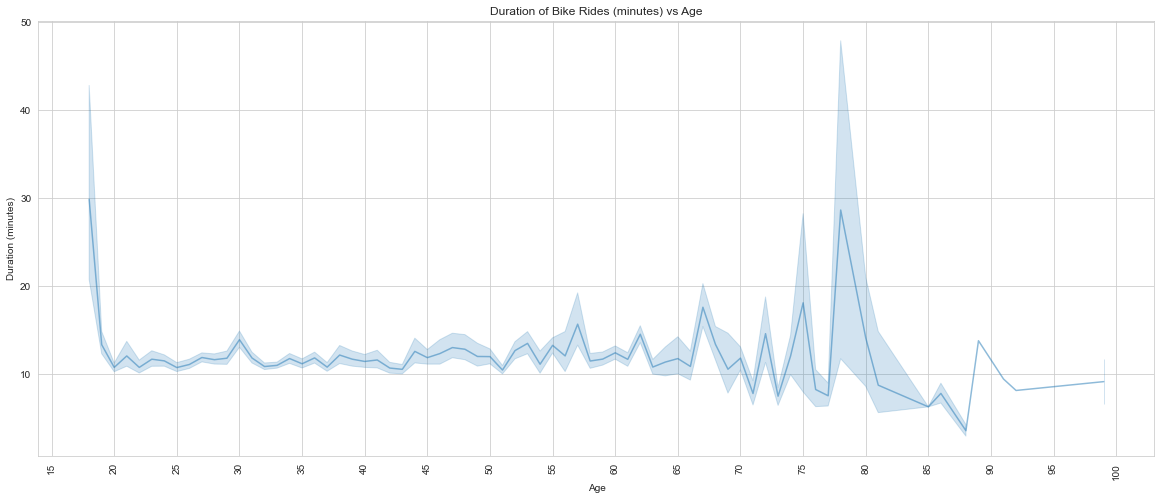

In [40]:
# plot
plt.figure(figsize = [20, 8])
sb.lineplot(data=df_bike, x='age', y='duration_min', alpha=0.5 );
plt.title('Duration of Bike Rides (minutes) vs Age')
plt.xlabel('Age')
plt.ylabel('Duration (minutes)');
plt.xticks(np.arange(15,101,5), rotation = 90);

18 year old riders on average spent 30 minutes on trips, this was closely followed by 76 - 78 year olds who averaged about 28 minutes on bike trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the lineplot of the relationship between age and bike ride duration, 18 year olds spent the longest time on trips while closely followed by 76 - 78 year olds.

Longer rides were done over the weekend, as observed in the lineplot of ride duration and day of the week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

For the lineplot of bike ride duration and hour of the day, the chart shows that the peak was at 3am. This was an interesting discovery.

## Multivariate Exploration

### User Type vs Duration (minutes) vs Member Gender?

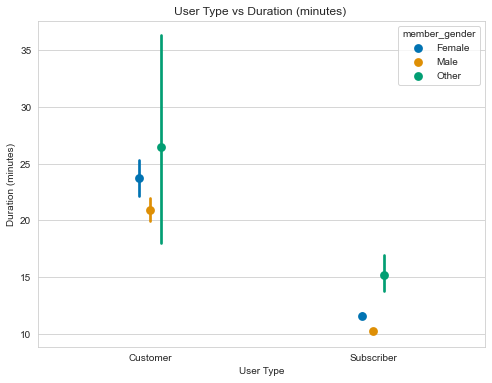

In [41]:
# plot
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_bike, x = 'user_type', y = 'duration_min', hue = 'member_gender',
           palette = 'colorblind', linestyles = '', dodge = 0.1)
plt.title('User Type vs Duration (minutes) ')
plt.ylabel('Duration (minutes)')
plt.xlabel('User Type')

plt.show();

For each user type, the other gender had longer biker rides on average with 27 minutes and 15 minutes for customers and subscribers respectively.

### User Type vs Age?

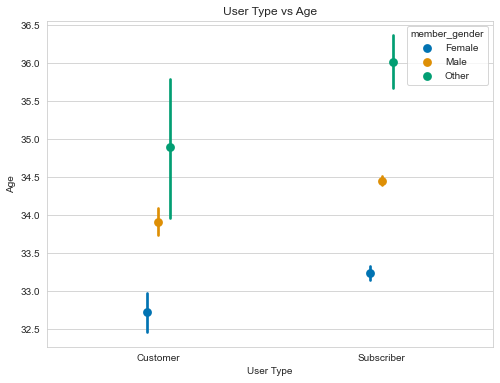

In [42]:
# plot
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_bike, x = 'user_type', y = 'age', hue = 'member_gender',
           palette = 'colorblind', linestyles = '', dodge = 0.1)
plt.title('User Type vs Age')
plt.ylabel('Age')
plt.xlabel('User Type')

plt.show();

Again, the other gender was generally older than other genders in both user type category.

### Ride Duration vs Time Periods vs User Type?

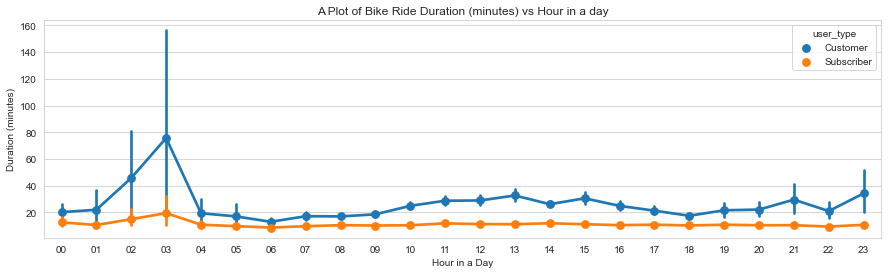

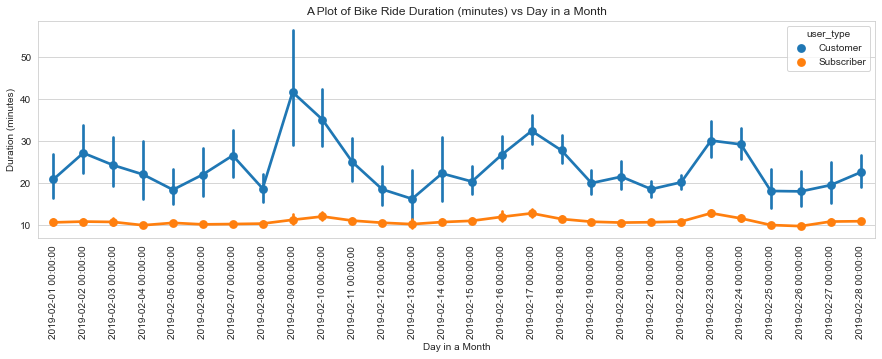

In [55]:
# plot 1
plt.figure(figsize= [15,4])
sb.pointplot(data = df_bike, x = 'start_hour', y = 'duration_min', hue='user_type');
plt.xlabel('Hour in a Day')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=0);
plt.title("A Plot of Bike Ride Duration (minutes) vs Hour in a day");

# plot 2
plt.figure(figsize= [15,4])
sb.pointplot(data = df_bike, x = 'start_day', y = 'duration_min', hue='user_type');
plt.xlabel('Day in a Month')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90);
plt.title("A Plot of Bike Ride Duration (minutes) vs Day in a Month");



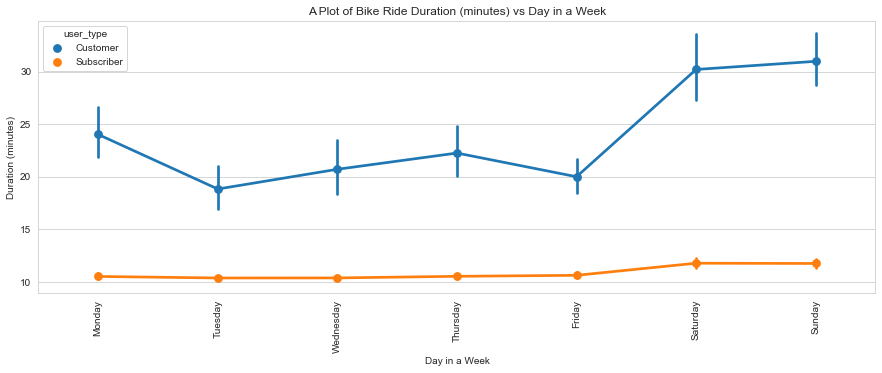

In [52]:
# plot 3
plt.figure(figsize= [15,5])
sb.pointplot(data = df_bike, x = 'start_weekday', y = 'duration_min', hue='user_type');
plt.xlabel('Day in a Week')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90);
plt.title("A Plot of Bike Ride Duration (minutes) vs Day in a Week");

Customers generally had longer ride durations no matter the time periods.

### Duration of Bike Rides (minutes) vs Age decomposed by Gender and User Type?

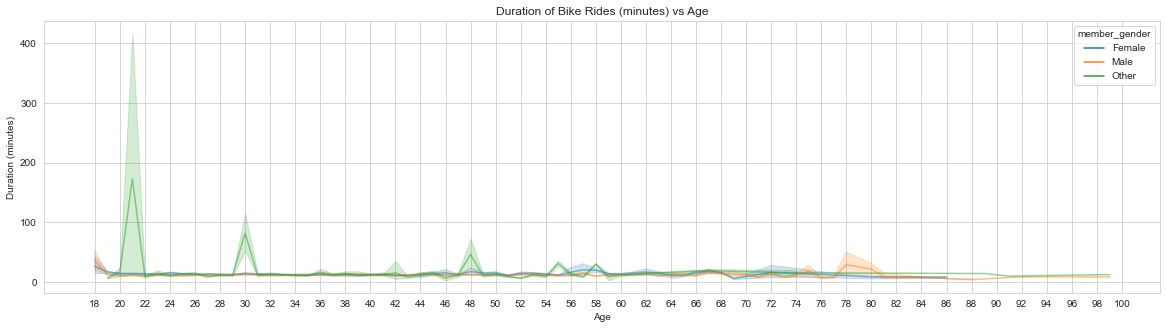

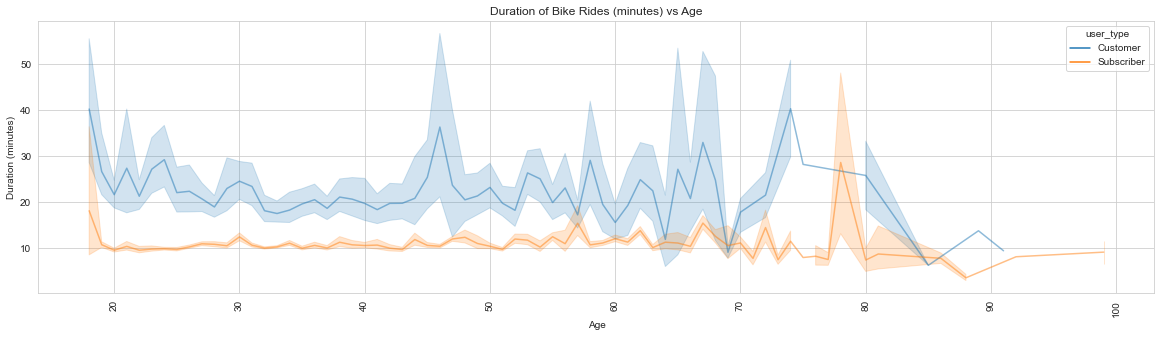

In [44]:
# plot 1
plt.figure(figsize = [20, 5])
sb.lineplot(data=df_bike, x='age', y='duration_min', hue='member_gender' , alpha=0.5 );
plt.title('Duration of Bike Rides (minutes) vs Age')
plt.xlabel('Age')
plt.ylabel('Duration (minutes)');
plt.xticks(np.arange(18,101, 2));

# plot 2
plt.figure(figsize = [20, 5])
sb.lineplot(data=df_bike, x='age', y='duration_min', hue='user_type' , alpha=0.5 );
plt.title('Duration of Bike Rides (minutes) vs Age')
plt.xlabel('Age')
plt.ylabel('Duration (minutes)');
plt.xticks(rotation=90);

The other gender generally has longer rides in most age brackets where males or females are not dominating. Customers had longer bike rides across majority of the age groups.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The duration of bike rides across time periods for subscribers was very consistent and did not vary widely like that of customers. This could be as a result of subscribers being the overhelming majority of riders.  

### Were there any interesting or surprising interactions between features?

1. It was suprising to observe that even though subscribers had a significant number of rides compared with customers, customers had the longest ride duration.

2. Another shocking observation was that of the other gender being averagely the oldest of riders by age, and also having the longest ride durations in almost all age groups.


## Conclusions
The steps above shows a detailed analysis of bike rides around San Fransisco area in the month of February 2019. The data was wrangled and analysed. The analysis showed the following:

1. Generally, Most bike rides lasted for 5 - 10 minutes, while subscribers rode for 10 - 15 minutes and 20 - 27 minutes for customers.
2. The other gender had the highest mean age of 35.8 years in the dataset. Also, subscribers had a mean age of 34.2 years compared to customers.
3. From the top 4 start and end stations, 3 stations pop up as the busiest - Market St at 10th St, San Francisco Caltrain Station 2  (Townsend St at 4th St) & Montgomery St BART Station (Market St at 2nd St) in no particular order. These bike stations can be targetted for marketing, bike maintenance and expansion plans with futher analysis.
4. For subscribers, males had 120,000 bike rides with about 35,000 and 5,000 rides by females and others respectively. More attention can be given to increasing the representation of the other gender either as subscribers or customers.
5. Most bike trips were carried out during the weekday (Monday - Friday), with over 25,000 trips recorded. The peak day for bike rides was on Thursday - 35,000 trips. Saturday and Sunday recorded about 15,000 trips. This tallies with earlier analysis done on days of the month.
6. Peak bike ride activities had two peaks in the morning from the hours of 7am to 9am, with trips above 10,000 - 8am had above 20,000 trips. Evening trips from the hours of 4pm to 6pm were also above 10,000 trips, with 5pm also having above 20,000 trips. This correlates with activity patterns of commuting to and from work.

## Reference(s)

Federico Raimondi Cominesi - https://www.linkedin.com/pulse/bike-sharing-analysis-federico-raimondi-cominesi

# Thank you!

*Any Questions?*

In [64]:
# Use this command if you are running this file in local
!jupyter nbconvert  Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 715502 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\abiolaPC\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\abiolaPC\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\abiolaPC\anaconda3\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\abiolaPC\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\abiolaPC\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\abiolaPC\anaconda3\lib\site-packages\